In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
fraud_data = pd.read_csv("/kaggle/input/credit-card-fraud-detection/creditcard.csv")

In [3]:
#view Raw data

print(fraud_data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
#dimension of the data

fraud_data.shape

(284807, 31)

In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#check columns
fraud_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#check & count null values

fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis

In [8]:
#Statistical Analysis of data

fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


we can see that the data for the variables from V1 to V28 is already scaled and cleaned. So there is no need for a data cleaning process in this case

In [10]:
#Response Variable Analysis

class_names = {0:'Not Fraud',1 :'Fraud'}
print(fraud_data.Class.value_counts().rename(index=class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [11]:
#Train Test Split

from sklearn.model_selection import train_test_split
y = fraud_data["Class"]
X = fraud_data.loc[:,fraud_data.columns != 'Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

# Data Modeling

In [12]:
#We will use Linear as well as Non-Linear Algorithms for this evaluation


# Linear Algorithms

Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
#Initialize the Logistic Regression Classifier
lr = LogisticRegression()

In [15]:
#fit data , train model using training data

lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
#prediction using test data

y_pred = lr.predict(X_test)

In [17]:
#calculate model accuracy by comparing (y_test,y_pred)

acc_lr = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy Of Logistic Regression Model : ',acc_lr)

Accuracy Of Logistic Regression Model :  99.9


Linear Discriminant Analysis

In [18]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
#intialize Lda classifier

lda = LinearDiscriminantAnalysis()

In [20]:
#fit data , train model using training data

lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [21]:
#prediction using test data

y_pred = lda.predict(X_test)

In [22]:
#calculate model accuracy by comparing (y_test,y_pred)

acc_lda = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy Of Linear Discriminant Model : ',acc_lda)

Accuracy Of Linear Discriminant Model :  99.93


# Non Linear Algorithms

Gaussian Naive Bayes

In [23]:
#Import Library for Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

In [24]:
#intialize

gnb = GaussianNB()

In [25]:
#fit data , train model using training data

gnb.fit(X_train,y_train)

GaussianNB()

In [26]:
#prediction using test data

y_pred = gnb.predict(X_test)

In [27]:
#calculate accuracy

acc_gnb = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy of Gaussian Naive Bayes : ',acc_gnb)

Accuracy of Gaussian Naive Bayes :  99.28


Decession Tree Classifier

In [28]:
#Import Library for Decision Tree

from sklearn.tree import DecisionTreeClassifier


In [29]:
model = DecisionTreeClassifier()

In [30]:
#fit data , train model using training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
#prediction using test data

y_pred = model.predict(X_test)

In [32]:
#calculate model accuracy by comparing (y_test,y_pred)


acc_DTC = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy of Decision Tree Classifier : ',acc_DTC)

Accuracy of Decision Tree Classifier :  99.91


Random Forest Classifier

In [33]:
#Import Library for Random Forest

from sklearn.ensemble import RandomForestClassifier

In [34]:
#intialize
model = RandomForestClassifier()

In [35]:
#fit data , train model using training data
model.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
#prediction using test data
y_pred = model.predict(X_test)

In [37]:
#calculate model accuracy by comparing (y_test,y_pred)

acc_RFC = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy of Random Forest Classifier : ',acc_RFC)

Accuracy of Random Forest Classifier :  99.95


support vector machine

In [38]:
#Import Library for Support Vector Machine Model

from sklearn import svm

In [39]:
#intialize svm
model = svm.SVC()

In [40]:
#fit data , train model using training data

model.fit(X_train,y_train)

SVC()

In [41]:
#prediction using test data
y_pred = model.predict(X_test)


In [42]:
#calculate model accuracy by comparing (y_test,y_pred)

acc_svm = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy of Support Vector Classifier : ',acc_svm)

Accuracy of Support Vector Classifier :  99.83


K Nearest Neighbor 

In [43]:
#Import Library for K Nearest Neighbour Model

from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Initialize the K Nearest Neighbour Model with Default Value of K=5
model = KNeighborsClassifier()

In [45]:
#fit data , train model using training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
#prediction using test data
y_pred = model.predict(X_test)

In [47]:
#calculate model accuracy by comparing (y_test,y_pred)

acc_knn = round(accuracy_score(y_test,y_pred) *100,2)
print('Accuracy of KNeighborsClassifier : ',acc_knn)

Accuracy of KNeighborsClassifier :  99.83


Model Selection

In [48]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
                       'Score': [acc_lr, acc_lda, acc_gnb, acc_DTC, acc_RFC, acc_svm, acc_knn]})

In [49]:
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,99.95
1,Linear Discriminant Analysis,99.93
3,Decision Tree,99.91
0,Logistic Regression,99.90
5,Support Vector Machines,99.83
6,K - Nearest Neighbors,99.83
2,Naive Bayes,99.28


We can select the Random Forest as it has the maximum accuracy

In [50]:
#Import Library for Random Forest

from sklearn.ensemble import RandomForestClassifier





In [51]:
#intialize
model = RandomForestClassifier()


In [52]:

#fit data , train model using training data
model.fit(X_train,y_train)



RandomForestClassifier()

In [53]:
#prediction using test data
y_pred = model.predict(X_test)

In [54]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)



[[94767     5]
 [   37   127]]


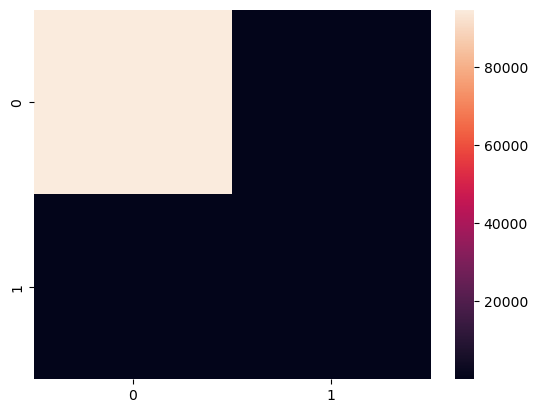

In [55]:
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()